### Imports and Definitions

In [2]:
from functions import *
from SQL_functions import *
from stats_forumulas import *
import config
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import errorcode
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Do abortion laws influence how many women end up working in tech?

We have two measures of "women working in tech":
 - Prevalence of women in tech (percentage of tech industry workers who are women)
 - Percentage difference of prevalence of women in tech versus prevalence of women in workforce overall
 
Let's try each of these and see the result.

#### Influence of Abortion: Using Prevalence of Women in Tech

**Hypothesis:** if we group countries by their abortion laws, we should find the one of these groups has a statistically significant difference in the prevalence of women in tech.

In [3]:
# Let's grab relevant data from the AWS MySQL database,
# and put it into a pandas DataFrame for analysis.

query1 = get_attributes_query(('value', 'laws'), 'abortion_info',
                              ('percent_women_in_tech', 'prevalence_of_women_in_tech'))
df1 = get_data(query1)

In [4]:
# Let's take a peek at our data

df1.sample(5)

,country,laws,prevalence_of_women_in_tech
8,Czech Republic,7,11.17
14,Greece,7,12.70
23,Lithuania,7,24.93
30,Poland,5,14.50
26,Mexico,7,14.22


Now let's run an ANOVA test with $\alpha = 0.05$

We are grouping by abortion laws (1 = strict, 7 = lenient),
and trying to see if there is a significant difference in
prevalence of women in tech among these groups.

In [5]:

anova_table_and_summary(df1, 'prevalence_of_women_in_tech', 'C(laws)')

                                 OLS Regression Results                                
Dep. Variable:     prevalence_of_women_in_tech   R-squared:                       0.065
Model:                                     OLS   Adj. R-squared:                 -0.038
Method:                          Least Squares   F-statistic:                    0.6297
Date:                         Thu, 03 Oct 2019   Prob (F-statistic):              0.644
Time:                                 19:48:00   Log-Likelihood:                -123.27
No. Observations:                           41   AIC:                             256.5
Df Residuals:                               36   BIC:                             265.1
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

We find an F-statistic of 0.6297, corresponding to a p-value of 0.644, which is not enough to reject the null hypothesis with $\alpha = 0.05$

Let's try to get an idea of what the distribution of each group looks like with a box plot:

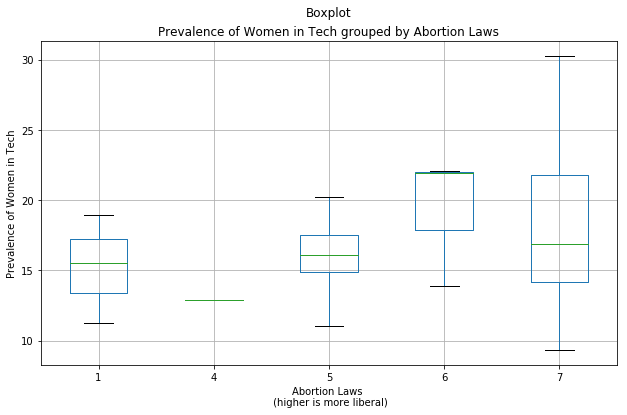

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
df1.boxplot('prevalence_of_women_in_tech', by='laws', ax=ax);
ax.set_xlabel('Abortion Laws \n (higher is more liberal)')
ax.set_ylabel('Prevalence of Women in Tech')
ax.set_title('Prevalence of Women in Tech grouped by Abortion Laws')
fig.suptitle("Boxplot");

We can also look at summary statistics.

In [7]:
df1.groupby('laws').describe()

prevalence_of_women_in_tech                                               \
                           count       mean       std    min      25%     50%   
laws                                                                            
1                            3.0  15.250000  3.847649  11.27  13.4000  15.530   
4                            1.0  12.910000       NaN  12.91  12.9100  12.910   
5                            6.0  15.981667  3.132905  11.00  14.8775  16.105   
6                            3.0  19.300000  4.685798  13.89  17.9100  21.930   
7                           28.0  18.062500  5.639539   9.29  14.1800  16.885   

                      
          75%    max  
laws                  
1     17.2400  18.95  
4     12.9100  12.91  
5     17.4975  20.25  
6     22.0050  22.08  
7     21.7675  30.28

 Notice that we have very few countries who are not in category 7 (most lenient). This may be hurting our chances of finding a statistically significant result. That being said, the means among groups do not seem to differ greatly.

#### Influence of Abortion: % Difference in Prevalence of Women in Tech versus Overall Workforce

**Hypothesis:** if we group countries by their abortion laws, we should find the one of these groups has a statistically significant difference in the percent difference between prevalence of women in tech versus the overall workforce.

In [8]:
# Let's grab relevant data from the AWS MySQL database,
# and put it into a pandas DataFrame for analysis.

query2 = get_attributes_query(('value', 'laws'), 'abortion_info',
                              ('percent_difference_of_women_in_workforce_and_women_in_tech', 'percent_difference_of_women_in_workforce_and_women_in_tech'))

df2 = get_data(query2)

In [9]:
# Let's take a peek at our data
df2.sample(5)

,country,laws,percent_difference_of_women_in_workforce_and_women_in_tech
2,Belgium,7,-32.02
1,Austria,7,-29.63
24,Luxembourg,6,-31.43
31,Portugal,7,-32.69
22,Latvia,7,-25.38


Now let's run an ANOVA test with $\alpha = 0.05$

We are grouping by abortion laws (1 = strict, 7 = lenient), and trying to see if there is a significant difference in percent difference of the prevalence of women in tech versus the overall workforce among these groups.

In [10]:
anova_table_and_summary(df2, 'percent_difference_of_women_in_workforce_and_women_in_tech', 'C(laws)')

                                                OLS Regression Results                                                
Dep. Variable:     percent_difference_of_women_in_workforce_and_women_in_tech   R-squared:                       0.052
Model:                                                                    OLS   Adj. R-squared:                 -0.053
Method:                                                         Least Squares   F-statistic:                    0.4960
Date:                                                        Thu, 03 Oct 2019   Prob (F-statistic):              0.739
Time:                                                                19:48:13   Log-Likelihood:                -119.19
No. Observations:                                                          41   AIC:                             248.4
Df Residuals:                                                              36   BIC:                             257.0
Df Model:                                       

We find an F-statistic of 0.496, corresponding to a p-value of 0.73, which is not enough to reject the null hypothesis with $\alpha = 0.05$

Let's try to get an idea of what the distribution of each group looks like with a box plot:

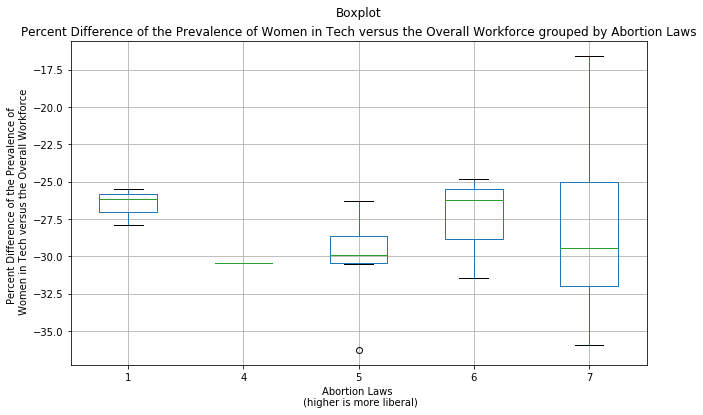

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
df2.boxplot('percent_difference_of_women_in_workforce_and_women_in_tech', by='laws', ax=ax);
ax.set_xlabel('Abortion Laws \n (higher is more liberal)')
ax.set_ylabel('Percent Difference of the Prevalence of \n Women in Tech versus the Overall Workforce')
ax.set_title('Percent Difference of the Prevalence of Women in Tech versus the Overall Workforce grouped by Abortion Laws')
fig.suptitle("Boxplot");

Again, there is no clear pattern here.

## Let's redo those same tests, but this time with fewer categories (just to see what happens)

We might think that perhaps the fact that many categories only have a handful of data points may have hurt the ability of our ANOVA to reach statistical significance. Let's try grouping into two categories.

In [12]:
df1_cat = df1.copy(deep=True)
df1_cat['laws'] = df1_cat['laws'].apply(lambda x: 1 if x > 6 else 0)

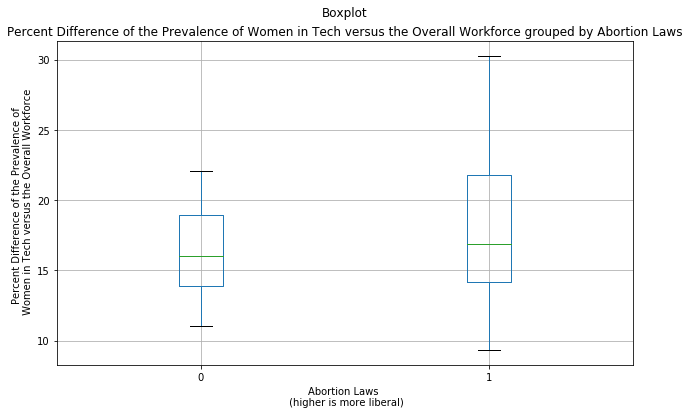

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
df1_cat.boxplot('prevalence_of_women_in_tech', by='laws', ax=ax);
ax.set_xlabel('Abortion Laws \n (higher is more liberal)')
ax.set_ylabel('Percent Difference of the Prevalence of \n Women in Tech versus the Overall Workforce')
ax.set_title('Percent Difference of the Prevalence of Women in Tech versus the Overall Workforce grouped by Abortion Laws')
fig.suptitle("Boxplot");

In [14]:
df2_cat = df2.copy(deep=True)
df2_cat['laws'] = df2['laws'].apply(lambda x: 1 if x > 6 else 0)

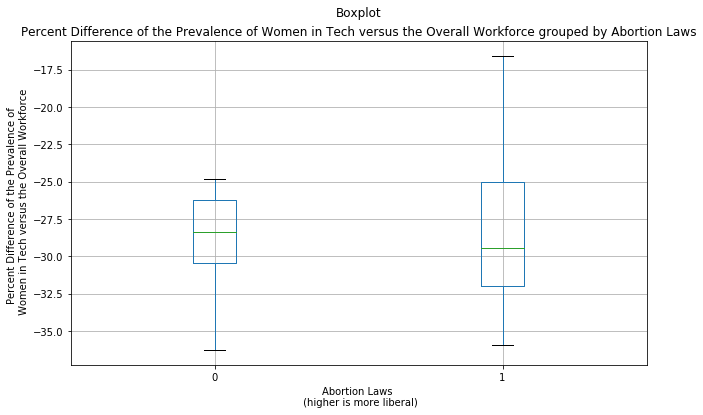

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
df2_cat.boxplot('percent_difference_of_women_in_workforce_and_women_in_tech', by='laws', ax=ax);
ax.set_xlabel('Abortion Laws \n (higher is more liberal)')
ax.set_ylabel('Percent Difference of the Prevalence of \n Women in Tech versus the Overall Workforce')
ax.set_title('Percent Difference of the Prevalence of Women in Tech versus the Overall Workforce grouped by Abortion Laws')
fig.suptitle("Boxplot");

In [16]:
anova_table_and_summary(df1_cat, 'prevalence_of_women_in_tech', 'laws');

                                 OLS Regression Results                                
Dep. Variable:     prevalence_of_women_in_tech   R-squared:                       0.025
Model:                                     OLS   Adj. R-squared:                  0.000
Method:                          Least Squares   F-statistic:                     1.001
Date:                         Thu, 03 Oct 2019   Prob (F-statistic):              0.323
Time:                                 19:48:19   Log-Likelihood:                -124.14
No. Observations:                           41   AIC:                             252.3
Df Residuals:                               39   BIC:                             255.7
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [17]:
anova_table_and_summary(df2_cat, 'percent_difference_of_women_in_workforce_and_women_in_tech', 'laws')

                                                OLS Regression Results                                                
Dep. Variable:     percent_difference_of_women_in_workforce_and_women_in_tech   R-squared:                       0.010
Model:                                                                    OLS   Adj. R-squared:                 -0.015
Method:                                                         Least Squares   F-statistic:                    0.4111
Date:                                                        Thu, 03 Oct 2019   Prob (F-statistic):              0.525
Time:                                                                19:48:20   Log-Likelihood:                -120.08
No. Observations:                                                          41   AIC:                             244.2
Df Residuals:                                                              39   BIC:                             247.6
Df Model:                                       

Still no significant difference!

## Attempt to replicate a study when we restrict to only EU + OECD countries:
### Does higher gender inequality index *increase* the percentage of STEM graduates who are female, as this counter-intuitive study suggests?

In [18]:
# First let's grab our gender inequality data.

inequality_query = \
    get_attributes_query(('gender_inequality_index', 'gender_inequality_index'), 'women_in_tech',
                         ('female_stem_graduates_percentage','female_stem_graduates_percentage'))

gend_df = get_data(inequality_query)

In [19]:
# Take a peak at the data

gend_df.sample(5)

,country,gender_inequality_index,female_stem_graduates_percentage
40,United States of America,0.203,24.24
26,Mexico,0.345,29.08
38,Turkey,0.328,37.11
17,Ireland,0.127,24.81
5,Chile,0.322,15.97


We want to turn take a look at the distribution of the continuous variable "gender_inequality_index" (our independent variable) to see what the most sensible way of turning it into categorical data is:

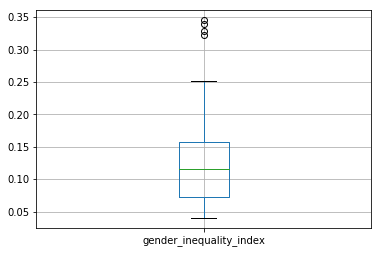

In [20]:
gend_df.boxplot('gender_inequality_index');

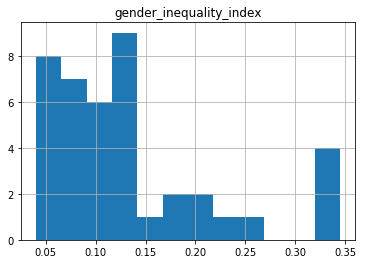

In [21]:
gend_df.hist('gender_inequality_index', bins = 12);

This is not unimodal, so perhaps our best bet it to divide it into two equal groups, by those above versus below the median value.

In [22]:
# Create a new Boolean column for whether the gender inequality index is above the median or not.

med = gend_df['gender_inequality_index'].median()

gend_df['gender_inequality_index_cat'] = \
    gend_df['gender_inequality_index'].apply(lambda x: True if x > med else False)

print("Median =", med)

Median = 0.116


In [23]:
# Take a peak at our new column

gend_df.head(3)

,country,gender_inequality_index,female_stem_graduates_percentage,gender_inequality_index_cat
0,Australia,0.120,23.66,True
1,Austria,0.078,20.63,False
2,Belgium,0.073,18.03,False


We're now going to run a two-sample t-test with $\alpha = 0.05$. We're running a one-tailed test, because we expect that the group with above-median gender inequality index will have a higher percentage of female stem graduates. Our null hypothesis is that the group with above-median gender inquality index will have lower (or equal) percentage of female stem graduates.

In [24]:
# Calculate the difference in means

mean_above_median = gend_df[gend_df['gender_inequality_index_cat'] == True]['female_stem_graduates_percentage'].mean()
mean_below_median = gend_df[gend_df['gender_inequality_index_cat'] == False]['female_stem_graduates_percentage'].mean()

print(mean_above_median - mean_below_median)

1.0820714285714281


There is a difference in means between the two groups, with the higher-inequality group having higher mean female STEM graduates. But is this difference statistically significant enough to reject the null hypothesis? Let's check by running the t-test.

In [25]:
stats.ttest_ind(gend_df[gend_df['gender_inequality_index_cat'] == False]['female_stem_graduates_percentage'],
                gend_df[gend_df['gender_inequality_index_cat'] == True]['female_stem_graduates_percentage'])

Ttest_indResult(statistic=-0.6783800154046294, pvalue=0.5015364299038596)

We can see that $p=0.502$, which is not less than $\alpha = 0.05$, so this t-test fails: we cannot reject the null hypthesis, and have failed to replicate the study. This raises the question: **why**?

Let's try to find the correlation coefficient between the percentage of STEM graduates who are female and the gender inequality index as continuous variables (without categorization) to see if perhaps the effect only appeared for the original researchers because they were capturing information our naive categorization of a continuous variable smudged over:

In [26]:
r, p = stats.pearsonr(gend_df['gender_inequality_index'], gend_df['female_stem_graduates_percentage'])
print('Correlation Coefficient:', r)
print('Two-tailed p-value:', p)

Correlation Coefficient: 0.2019175212513302
Two-tailed p-value: 0.2055105145763213


Even still, we do not get significance on a level below $\alpha = 0.05$. So we still don't know why we haven't replicated the original study.

Perhaps we can do a scatter plot of our data and compare with that of the authors. We should transform our measure of gender inequality to one similar to the measure of gender *equality* used by the authors by the transformation $x \mapsto 1-x$

/Users/flatrionschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


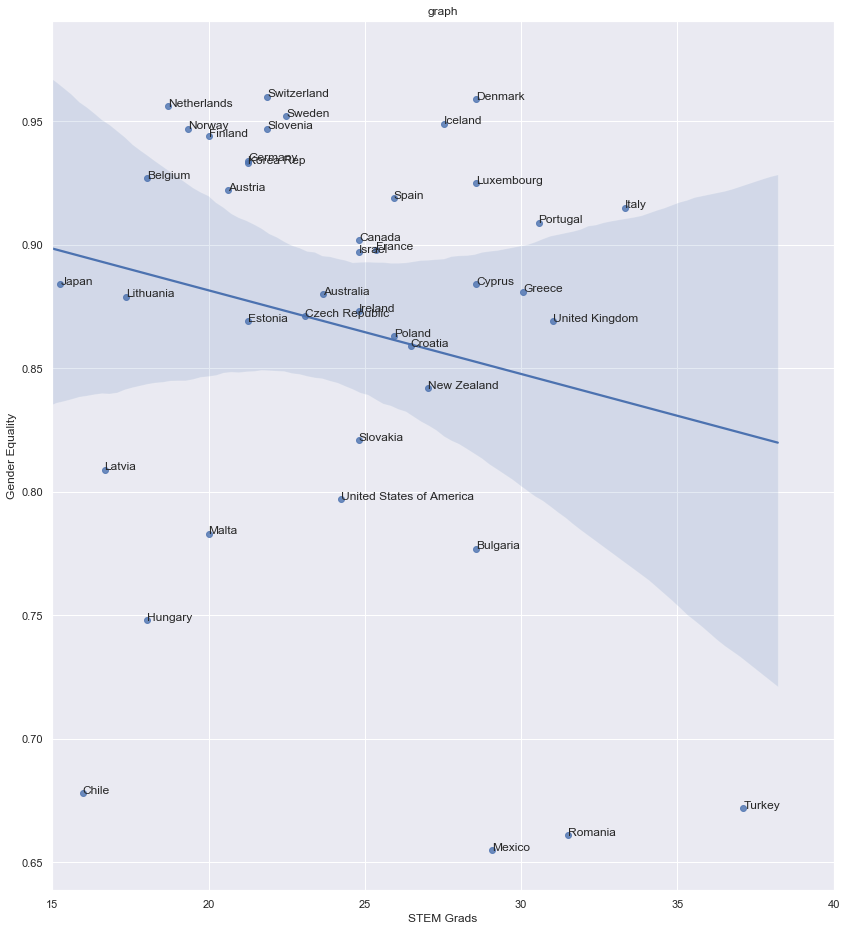

In [27]:
sns.set(rc = {'figure.figsize': (14,16)})
txt = list(gend_df['country'])
x = list(gend_df['female_stem_graduates_percentage'])
y = list(1-(gend_df["gender_inequality_index"]))
ax = sns.regplot(x,y)
ax.set(title = 'graph', xlabel='STEM Grads', ylabel='Gender Equality', xlim = (15,40));
for i in range(len(txt)):
    ax.annotate(txt[i], (x[i], y[i]));

## Female Higher Ed Enrollment versus Proportion of Women Workers in Tech

In [28]:
higher_ed_query = '''
        SELECT
            w. country
                AS country,
            100*w.female_tech_workforce_thousands / (w.female_workforce_millions * 1000)
                AS perc_women_workers_in_tech,
            100 * max(t.value) / p.value
                AS women_enrolled_in_ter_ed_normalized_by_total_pop
        FROM
            gender.women_in_tech AS w
            JOIN
            gender.ter_ed_enrollment AS t
            ON w.country = t.country
            JOIN gender.population_data_full as p
            ON w.country = p.country
        WHERE
            t.subgroup = "Female"
        GROUP BY
            t.country;'''


df_edu = get_data(higher_ed_query)

In [29]:
df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop'] = \
    df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop'].astype(float)

In [30]:
df_edu['perc_women_workers_in_tech'].describe()

count    40.000000
mean      1.312017
std       0.592916
min       0.252336
25%       0.852204
50%       1.337193
75%       1.603316
max       2.759690
Name: perc_women_workers_in_tech, dtype: float64

In [31]:
df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop'].describe()

count    40.000000
mean      2.157532
std       0.847535
min       0.269900
25%       1.670275
50%       2.096250
75%       2.663575
max       4.286200
Name: women_enrolled_in_ter_ed_normalized_by_total_pop, dtype: float64

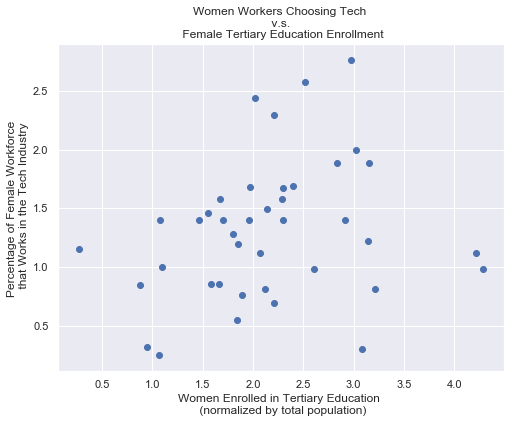

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))

x = df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop']
y = df_edu['perc_women_workers_in_tech']
ax.scatter(x,y)
ax.set_xlabel("Women Enrolled in Tertiary Education \n (normalized by total population)")
ax.set_ylabel("Percentage of Female Workforce \n that Works in the Tech Industry")
ax.set_title("Women Workers Choosing Tech \n v.s. \n Female Tertiary Education Enrollment")
plt.show()

In [33]:
med2 = df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop'].median()

In [34]:
df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop_cat'] = \
    df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop'].apply(lambda x: True if x > med2 else False)

In [35]:
df_edu.head(3)

,country,perc_women_workers_in_tech,women_enrolled_in_ter_ed_normalized_by_total_pop,women_enrolled_in_ter_ed_normalized_by_total_pop_cat
0,Australia,2.298129,2.2130,True
1,Austria,1.461905,1.5511,False
2,Belgium,1.192140,1.8558,False


In [36]:
x = df_edu[df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop_cat'] == True]['perc_women_workers_in_tech']
y = df_edu[df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop_cat'] == False]['perc_women_workers_in_tech']
stats.ttest_ind(x,y)

Ttest_indResult(statistic=1.8221744484533022, pvalue=0.07630582090113038)

We have a p value of 0.076, which is not less than $\alpha=0.05$ as is our threshhold for rejecting the null hypothesis. 

We can also run a test without our categorization (just as a curiosity: we could not use this result, due to already having done a t-test on the same data).

In [37]:
stats.pearsonr(df_edu['perc_women_workers_in_tech'], df_edu['women_enrolled_in_ter_ed_normalized_by_total_pop'])

(0.23181881073105137, 0.1500511224010598)

Interestingly, this has an even higher p-value, so we would be even fruther from rejecting the null hypothesis here!

It is more likely than not that the null hypothesis is false, but this was not the standard we have set, so we cannot reject the null.